In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

/Users/kumarmankala/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
## Process Raw File
raw_file="KumarMankala_glucose_12-26-2024.csv"
clean_file="cgm_clean_data.csv"
cgm=pd.read_csv(raw_file,usecols=[0, 1, 2, 3, 4, 5])
cgm.columns=['device_type','device_id','time','recordtype','glucose1','glucose2']
cgm['time_formatted']=pd.to_datetime(cgm.time)
cgm['glucose']=None
cgm.loc[~cgm.glucose1.isnull(),'glucose']=cgm.glucose1
cgm.loc[~cgm.glucose2.isnull(),'glucose']=cgm.glucose2
cgm.loc[~cgm.glucose.isnull(),['device_id','time','glucose']].to_csv(clean_file,index=False)

In [39]:
cgm=pd.read_csv("cgm_clean_data.csv")
cgm['time']=pd.to_datetime(cgm.time)


/var/folders/vz/xddb9gks5hl38d52gc2h0m4r0000gp/T/ipykernel_61048/3814545759.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cgm['time']=pd.to_datetime(cgm.time)


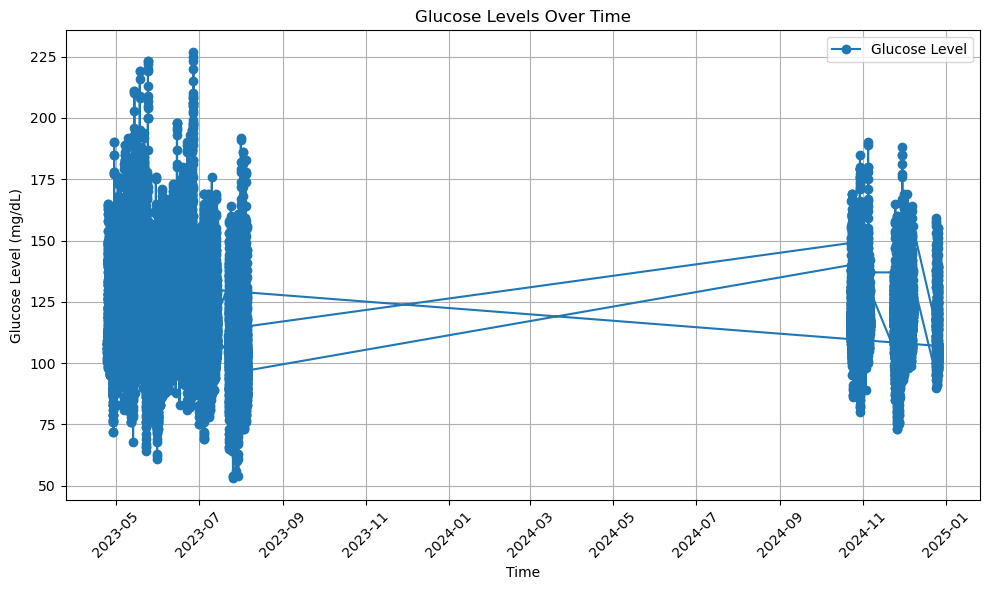

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cgm['time'], cgm['glucose'], marker='o', label='Glucose Level')
plt.title('Glucose Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose Level (mg/dL)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Create an interactive plot
fig = px.line(
    cgm,
    x='time',
    y='glucose',
    title='Interactive Glucose Levels Over Time',
    labels={'time': 'Time', 'glucose': 'Glucose Level (mg/dL)'},
    markers=True
)

/Users/kumarmankala/anaconda3/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [63]:
# Add interactivity for selecting a time period
fig.update_xaxes(rangeslider_visible=True, title_text="Time")
fig.update_yaxes(title_text="Glucose Level (mg/dL)")

# Show the interactive plot
fig.show()

In [67]:
nov_cgm=cgm.loc[(cgm.time < '2024-12-07') & (cgm.time > '2024-11-25')]

In [68]:
nov_cgm

,device_id,time,glucose
31828,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-11-25 00:01:00,116.0
31829,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-11-25 00:06:00,116.0
31830,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-11-25 00:11:00,117.0
31831,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-11-25 00:16:00,122.0
31832,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-11-25 00:21:00,117.0
...,...,...,...
39426,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-12-06 15:18:00,132.0
39427,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-12-06 15:23:00,141.0
39428,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-12-06 17:28:00,132.0
39429,1fad27c1-2a23-49a3-9506-c1d0692e1723,2024-12-06 17:29:00,136.0


In [69]:
nov_ts = nov_cgm[['time','glucose']].set_index('time')

In [71]:
nov_ts=nov_ts.sort_index()

In [85]:
#Plot Spikes
# Compute the first derivative (rate of change)
nov_ts['gradient'] = nov_ts['glucose'].diff() / (
    nov_ts.index.to_series().diff().dt.total_seconds()
)

# Compute the second derivative (rate of change of the gradient)
nov_ts['curvature'] = nov_ts['gradient'].diff() / (
    nov_ts.index.to_series().diff().dt.total_seconds()
)

# Find the steepest spikes (max/min of the first derivative)
steepest_spikes = nov_ts.loc[
    nov_ts['gradient'].abs() == nov_ts['gradient'].abs().max()
]

# # Plot the glucose levels and gradient for visualization
# plt.figure(figsize=(12, 6))

# # Glucose levels
# plt.subplot(2, 1, 1)
# plt.plot(nov_ts.index, nov_ts['glucose'], label='Glucose Levels')
# plt.scatter(steepest_spikes.index, steepest_spikes['glucose'], color='red', label='Steepest Spikes')
# plt.title('Glucose Levels and Steepest Changes')
# plt.ylabel('Glucose Level (mg/dL)')
# plt.legend()
# plt.grid()

# # Gradient (steepness)
# plt.subplot(2, 1, 2)
# plt.plot(nov_ts.index, nov_ts['gradient'], label='Gradient (Steepness)', color='orange')
# plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
# plt.title('Rate of Change (Steepness)')
# plt.xlabel('Time')
# plt.ylabel('Gradient')
# plt.legend()
# plt.grid()

# plt.tight_layout()
# plt.show()

# # Display the steepest spike(s) with their time and steepness
# print("Steepest Spikes:")
# print(steepest_spikes[['glucose', 'gradient']])

# Create an interactive plot with glucose levels
fig = go.Figure()

# Glucose Levels Plot
fig.add_trace(go.Scatter(
    x=nov_ts.index,
    y=nov_ts['glucose'],
    mode='lines',
    name='Glucose Levels',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Highlight Steepest Spikes
fig.add_trace(go.Scatter(
    x=steepest_spikes.index,
    y=steepest_spikes['glucose'],
    mode='markers',
    name='Steepest Spikes',
    marker=dict(color='red', size=10),
    hoverinfo='x+y'
))

# Gradient (Steepness) Plot
fig.add_trace(go.Scatter(
    x=nov_ts.index,
    y=nov_ts['gradient'],
    mode='lines',
    name='Gradient (Steepness)',
    line=dict(color='orange', dash='dot'),
    hoverinfo='x+y'
))

# Update Layout for Interactivity
fig.update_layout(
    title="Interactive Glucose Levels and Steepness Analysis",
    xaxis_title="Time",
    yaxis_title="Glucose Level / Gradient",
    legend=dict(title="Legend"),
    hovermode="x unified",
    template="plotly_white",
    showlegend=True
)

# Show the interactive plot
fig.show()

In [86]:
# Find the fastest rise (maximum positive gradient)
fastest_rise = nov_ts.loc[nov_ts['gradient'] == nov_ts['gradient'].max()]

# Add a marker for the fastest rise to the interactive plot
fig = go.Figure()

# Glucose Levels Plot
fig.add_trace(go.Scatter(
    x=nov_ts.index,
    y=nov_ts['glucose'],
    mode='lines',
    name='Glucose Levels',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Highlight Steepest Spikes
fig.add_trace(go.Scatter(
    x=steepest_spikes.index,
    y=steepest_spikes['glucose'],
    mode='markers',
    name='Steepest Spikes',
    marker=dict(color='red', size=10),
    hoverinfo='x+y'
))

# Highlight Fastest Magnitude Rise
fig.add_trace(go.Scatter(
    x=fastest_rise.index,
    y=fastest_rise['glucose'],
    mode='markers',
    name='Fastest Rise',
    marker=dict(color='green', size=12, symbol='diamond'),
    hoverinfo='x+y'
))

# Gradient (Steepness) Plot
fig.add_trace(go.Scatter(
    x=nov_ts.index,
    y=nov_ts['gradient'],
    mode='lines',
    name='Gradient (Steepness)',
    line=dict(color='orange', dash='dot'),
    hoverinfo='x+y'
))

# Update Layout for Interactivity
fig.update_layout(
    title="Interactive Glucose Levels with Fastest Rise and Steepness",
    xaxis_title="Time",
    yaxis_title="Glucose Level / Gradient",
    legend=dict(title="Legend"),
    hovermode="x unified",
    template="plotly_white",
    showlegend=True
)

# Show the interactive plot
fig.show()

# Display the details of the fastest rise
print("Fastest Rise:")
print(fastest_rise[['glucose', 'gradient']])


Fastest Rise:
                     glucose  gradient
time                                  
2024-11-25 06:16:00    113.0       inf
2024-11-25 18:11:00    121.0       inf
2024-11-26 14:26:00    147.0       inf
2024-11-26 16:30:00    113.0       inf
2024-11-26 17:40:00    124.0       inf
2024-11-26 18:36:00    112.0       inf
2024-11-27 09:25:00    112.0       inf
2024-11-27 10:52:00    114.0       inf
2024-11-28 12:25:00    121.0       inf
2024-11-28 22:00:00    118.0       inf
2024-11-28 23:30:00    109.0       inf
2024-12-02 09:50:00    121.0       inf
2024-12-04 07:35:00    117.0       inf
2024-12-04 11:20:00    128.0       inf
2024-12-05 07:40:00    113.0       inf


In [80]:
#PLOT Fourier Frequencies
# Ensure time series is sorted and only contains the data column for FFT
glucose_series = nov_ts['glucose'].dropna()

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(glucose_series)

# Compute the corresponding frequencies
n = len(glucose_series)
freq = np.fft.fftfreq(n, d=(glucose_series.index[1] - glucose_series.index[0]).total_seconds())

# Take the magnitude (absolute value) of the FFT results
magnitude = np.abs(fft_result)

# Get the positive half of frequencies and corresponding magnitudes
positive_freq = freq[freq > 0]
positive_magnitude = magnitude[freq > 0]

# Find the top N frequencies (sorted by magnitude)
top_n = 5
top_indices = np.argsort(positive_magnitude)[-top_n:][::-1]  # Indices of top frequencies
top_frequencies = positive_freq[top_indices]
top_magnitudes = positive_magnitude[top_indices]

# Create an interactive plot using plotly
fig = go.Figure()

# Add the frequency spectrum
fig.add_trace(go.Scatter(
    x=positive_freq,
    y=positive_magnitude,
    mode='lines',
    name='Frequency Spectrum'
))

# Highlight the top frequencies
fig.add_trace(go.Scatter(
    x=top_frequencies,
    y=top_magnitudes,
    mode='markers',
    name='Top Frequencies',
    marker=dict(size=10, color='red')
))

# Update layout for interactivity
fig.update_layout(
    title="Interactive Frequency Spectrum",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    template="plotly_white",
    showlegend=True
)

# Show the plot
fig.show()

# # Display top frequencies and their magnitudes
# print("Top Frequencies:")
# for i, freq in enumerate(top_frequencies):
#     print(f"Frequency: {freq:.4f} Hz, Magnitude: {top_magnitudes[i]:.4f}")

# # Plot the frequency spectrum
# plt.figure(figsize=(12, 6))
# plt.plot(positive_freq, positive_magnitude)
# plt.scatter(top_frequencies, top_magnitudes, color='red', label='Top Frequencies')
# plt.title("Frequency Spectrum")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.grid(True)
# plt.legend()
# plt.show()

/var/folders/vz/xddb9gks5hl38d52gc2h0m4r0000gp/T/ipykernel_44939/1948102470.py:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



<Axes: xlabel='time'>

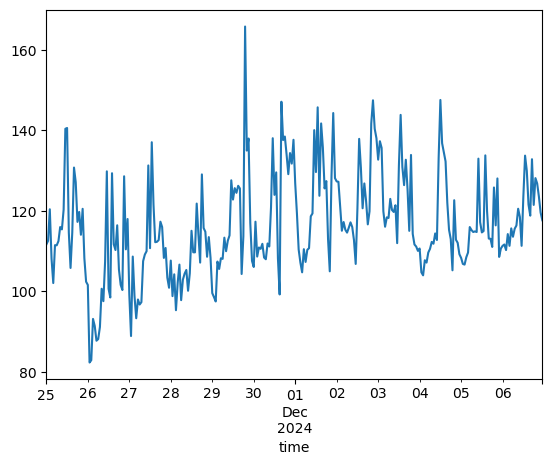

In [74]:
nov_ts['glucose'].resample('H').mean().plot()

In [12]:
foodlog=[]
with open('foodlog/foodlog.txt','r') as file:
    for line in file:
        foodlog.append(line.strip())

df_foodlog=pd.DataFrame(foodlog,columns=['log'])

In [17]:
df_foodlog.log.sample(1).values

array(['5/9/23, 1:17\u202fPM - Kumar Mankala: 1:17 stir fry rice'],
      dtype=object)

In [19]:
# Initialize lists to store the extracted data
dates_times = []
foods = []

# Read the file and parse the data
with open('foodlog/foodlog.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [21]:
current_date_time = None  # To handle multi-line food entries
for line in lines:
    line = line.strip()
    if ' - Kumar Mankala: ' in line:  # New entry starts here
        # Split into date&time and food parts
        parts = line.split(' - Kumar Mankala: ')
        current_date_time = parts[0].strip()
        food = parts[1].strip()
        dates_times.append(current_date_time)
        foods.append(food)
    elif current_date_time:  # Multi-line food entry continues
        # Append additional lines to the last food entry
        foods[-1] += f" {line.strip()}"


In [22]:
# Create a DataFrame
df = pd.DataFrame({
    'date&time': dates_times,
    'food': foods
})

In [32]:
df['logtime']=pd.to_datetime(df['date&time'])

/var/folders/vz/xddb9gks5hl38d52gc2h0m4r0000gp/T/ipykernel_61048/3568076616.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['logtime']=pd.to_datetime(df['date&time'])


In [ ]:
df[['logtime','food']].to_csv("foodlog.csv",index=False)